In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

In [2]:
yelp_df = pd.read_csv("cleaned_data.csv")

yelp_df.head()

,id,name,image_url,is_closed,url,review_count,rating,transactions,price,cuisines,latitude,longitude,state,city
0,a0IET3_yCFcO36OqGSsisg,Eataly NYC Flatiron,https://s3-media4.fl.yelpcdn.com/bphoto/1UDlnu...,False,https://www.yelp.com/biz/eataly-nyc-flatiron-n...,6100,4.0,"delivery, pickup",2,Italian,40.742101,-73.989922,NY,New York
1,zj8Lq1T8KIC5zwFief15jg,Prince Street Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/PfI8oV...,False,https://www.yelp.com/biz/prince-street-pizza-n...,5026,4.5,"delivery, pickup",1,Italian,40.723088,-73.994530,NY,New York
2,16ZnHpuaaBt92XWeJHCC5A,Olio e Più,https://s3-media4.fl.yelpcdn.com/bphoto/CUpPgz...,False,https://www.yelp.com/biz/olio-e-pi%C3%B9-new-y...,4821,4.5,"delivery, pickup",2,Italian,40.733798,-73.999774,NY,New York
3,vyoA8dxwScuMV_AsTcjQcg,L & B Spumoni Gardens,https://s3-media1.fl.yelpcdn.com/bphoto/hN5xKw...,False,https://www.yelp.com/biz/l-and-b-spumoni-garde...,4646,4.0,"delivery, pickup",2,Italian,40.594715,-73.981316,NY,Brooklyn
4,22nKUyCIbpnzR6R3_g1ptQ,Carmine's Italian Restaurant - Times Square,https://s3-media1.fl.yelpcdn.com/bphoto/0UszeE...,False,https://www.yelp.com/biz/carmines-italian-rest...,4640,4.0,"delivery, pickup",2,Italian,40.757498,-73.986653,NY,New York


In [3]:
# Create new columns and check if 'delivery', 'pickup', or 'restaurant_reservation' is in 'transactions'
yelp_df['delivery'] = yelp_df['transactions'].str.contains('delivery', case=False, na=False)
yelp_df['pickup'] = yelp_df['transactions'].str.contains('pickup', case=False, na=False)
yelp_df['restaurant_reservation'] = yelp_df['transactions'].str.contains('restaurant_reservation', case=False, na=False)

# Fill NaN values with False in the new columns
yelp_df['delivery'] = yelp_df['delivery'].fillna(False)
yelp_df['pickup'] = yelp_df['pickup'].fillna(False)
yelp_df['restaurant_reservation'] = yelp_df['restaurant_reservation'].fillna(False)

In [4]:
yelp_df.drop(columns='transactions', inplace= True)

yelp_df.dropna(inplace=True)

In [5]:
# Define a function to determine 'success'
def is_success(rating):
    return rating > 3.7

# Create a new 'success' column based on the 'rating' column
yelp_df['success'] = yelp_df['rating'].apply(is_success)

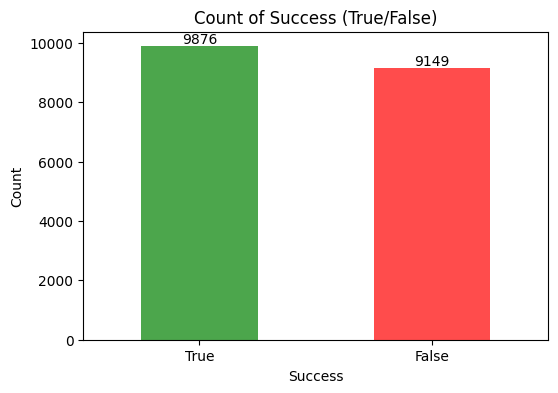

In [6]:
# Count the values in the 'success' column
success_counts = yelp_df['success'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Count of Success (True/False)')
plt.xlabel('Success')
plt.ylabel('Count')

# Annotate the bars with counts
for index, value in enumerate(success_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

In [7]:
# Set features
y = yelp_df['success']
X = yelp_df.drop(columns=['success'])


<ipython-input-8-8b1c33342ed7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


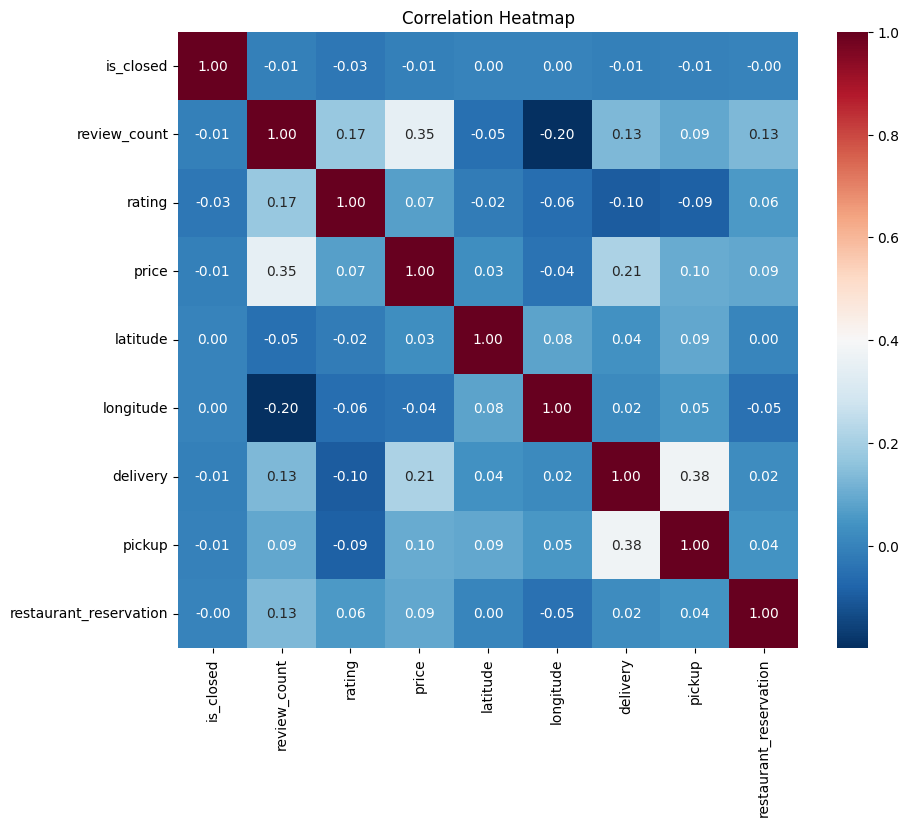

In [8]:
# Generate a correlation matrix for your features (X)
correlation_matrix = X.corr()

# Create a heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [9]:
X.drop(columns=['id','name','image_url','url','state','city'], inplace=True)



In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19025 entries, 0 to 19142
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   is_closed               19025 non-null  bool   
 1   review_count            19025 non-null  int64  
 2   rating                  19025 non-null  float64
 3   price                   19025 non-null  int64  
 4   cuisines                19025 non-null  object 
 5   latitude                19025 non-null  float64
 6   longitude               19025 non-null  float64
 7   delivery                19025 non-null  bool   
 8   pickup                  19025 non-null  bool   
 9   restaurant_reservation  19025 non-null  bool   
dtypes: bool(4), float64(3), int64(2), object(1)
memory usage: 1.1+ MB


In [11]:
# Create label encoder object
le = LabelEncoder()

# Encode categorical variables
X.loc[:,'cuisines'] = le.fit_transform(X.loc[:,'cuisines'])


# convert float columns to integer
X.loc[:,['rating', 'latitude', 'longitude']] = X.loc[:,['rating', 'latitude', 'longitude']].astype(int)

X = X.astype(int)

<ipython-input-11-5d6a54f881fb>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'cuisines'] = le.fit_transform(X.loc[:,'cuisines'])
<ipython-input-11-5d6a54f881fb>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,['rating', 'latitude', 'longitude']] = X.loc[:,['rating', 'latitude', 'longitude']].astype(int)


In [12]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=10
hidden_nodes_layer2=30
hidden_nodes_layer3=5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))


# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=10)

Epoch 1/10
253/253 [==============================] - 4s 7ms/step - loss: 0.6474 - accuracy: 0.6391 - val_loss: 0.4905 - val_accuracy: 0.8591
Epoch 2/10
253/253 [==============================] - 2s 8ms/step - loss: 0.2877 - accuracy: 0.9539 - val_loss: 0.1292 - val_accuracy: 0.9881
Epoch 3/10
253/253 [==============================] - 2s 9ms/step - loss: 0.0657 - accuracy: 0.9926 - val_loss: 0.0337 - val_accuracy: 0.9951
Epoch 4/10
253/253 [==============================] - 1s 5ms/step - loss: 0.0201 - accuracy: 0.9976 - val_loss: 0.0134 - val_accuracy: 0.9979
Epoch 5/10
253/253 [==============================] - 2s 6ms/step - loss: 0.0087 - accuracy: 0.9993 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/10
253/253 [==============================] - 2s 6ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/10
253/253 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


298/298 - 1s - loss: 0.0010 - accuracy: 0.9999 - 705ms/epoch - 2ms/step
Loss: 0.0010495708556845784, Accuracy: 0.9998948574066162


In [18]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
